In [156]:
import scipy.spatial as spatial
import numpy as np
import timeit
import matplotlib.pyplot as plt

## 2D k-Nearest Neighbout Search with kd-trees

In [114]:
S = np.random.randint(50, size=(30, 2))
tree = spatial.KDTree(S)
tree.data

array([[40, 17],
       [ 3,  0],
       [49, 43],
       [18, 18],
       [27, 45],
       [22, 42],
       [39, 11],
       [24, 12],
       [16, 31],
       [42, 45],
       [11, 22],
       [21, 15],
       [23, 14],
       [24,  7],
       [ 9, 49],
       [34, 48],
       [12, 26],
       [ 5, 47],
       [15, 15],
       [26, 43],
       [ 1,  2],
       [33, 34],
       [36, 46],
       [20, 26],
       [38,  5],
       [40, 40],
       [22, 14],
       [40,  4],
       [22, 43],
       [28, 19]])

### Query the kd-tree for k nearest neighbors 

In [120]:
k = 3
target_count = 5
target_points = np.random.randint(50, size=(target_count, 2))


def knn_search(k_value, target_points):
    result = tree.query(target_points, k = k_value)
    result_distance = result[0]
    result_locations = result[1]

    for index in range(len(target_points)):
        print "location of the point: [%d,%d]"%(target_points[index][0],target_points[index][1])

        neighbor_distances = result_distance[index]
        neighbor_locations = result_locations[index]

        print "neighbor        location      distance"
        for kth_neighbor in range(k_value):
            kth_neighbor_location = tree.data[neighbor_locations[kth_neighbor]]
            kth_neighbor_distance = neighbor_distances[kth_neighbor]
            print "point%d          [%2d,%2d]        [%.3f]" % (kth_neighbor,kth_neighbor_location[0],kth_neighbor_location[1],kth_neighbor_distance)

        print "---------------------------------------"
knn_search(k,target_points)

location of the point: [6,31]
neighbor        location      distance
point0          [12,26]        [7.810]
point1          [16,31]        [10.000]
point2          [11,22]        [10.296]
---------------------------------------
location of the point: [19,9]
neighbor        location      distance
point0          [24, 7]        [5.385]
point1          [24,12]        [5.831]
point2          [22,14]        [5.831]
---------------------------------------
location of the point: [26,19]
neighbor        location      distance
point0          [28,19]        [2.000]
point1          [23,14]        [5.831]
point2          [21,15]        [6.403]
---------------------------------------
location of the point: [46,24]
neighbor        location      distance
point0          [40,17]        [9.220]
point1          [39,11]        [14.765]
point2          [33,34]        [16.401]
---------------------------------------
location of the point: [47,3]
neighbor        location      distance
point0          [40, 

### Find all points within distance r of point(s) 

In [125]:
def range_search(target_points, target_distance):
    result = tree.query_ball_point(x = target_points, r = target_distance)

    print "for each target point neighbors within distance of %d"%(target_distance)
    for index in range(len(target_points)):
        print "location of the point: [%d,%d]"%(target_points[index][0],target_points[index][1])
        print "location of neighbors with in distance r: "
        print tree.data[result[index]]
        print "---------------------------------------"
        
target_distance = 10
range_search(target_points,target_distance)

for each target point neighbors within distance of 10
location of the point: [6,31]
location of neighbors with in distance r: 
[[16 31]
 [12 26]]
---------------------------------------
location of the point: [19,9]
location of neighbors with in distance r: 
[[18 18]
 [24 12]
 [21 15]
 [23 14]
 [24  7]
 [15 15]
 [22 14]]
---------------------------------------
location of the point: [26,19]
location of neighbors with in distance r: 
[[18 18]
 [24 12]
 [21 15]
 [23 14]
 [22 14]
 [28 19]
 [20 26]]
---------------------------------------
location of the point: [46,24]
location of neighbors with in distance r: 
[[40 17]]
---------------------------------------
location of the point: [47,3]
location of neighbors with in distance r: 
[[38  5]
 [40  4]]
---------------------------------------


## ND k-Nearest Neighbout Search with kd-trees

In [193]:
dimensions = range(2,16)

def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [194]:
k = 5
target_count = 20
running_time_knn = []

def knn_search_nd(S, target_points, k_value):
    tree = spatial.KDTree(S)
    result = tree.query(target_points, k = k_value)

for dimension in dimensions:
    S = np.random.randint(100, size=(50, dimension))
    target_points = np.random.randint(100, size=(target_count, dimension))
    
    knn_search_nd_wrapped = wrapper(knn_search_nd, S, target_points, k)
    average = []
    
    for i in range(8):
        average.append(timeit.timeit(knn_search_nd_wrapped, number=1000))
        
    time = sum(average)/len(average)
    running_time_knn.append(time)


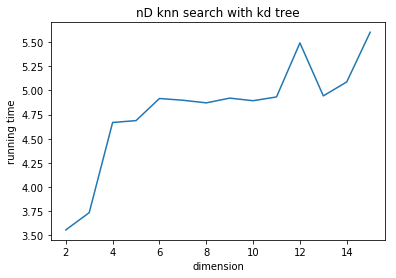

In [195]:
plt.plot(dimensions, running_time_knn)
plt.title("nD knn search with kd tree")
plt.ylabel("running time")
plt.xlabel("dimension")
plt.show()

In [198]:
def range_search_nd(S, target_points, target_distance):
    tree = spatial.KDTree(S)
    result = tree.query_ball_point(x = target_points, r = target_distance)
    
target_count = 40
target_distance = 5
running_time_range = []

for dimension in dimensions:
    S = np.random.randint(100, size=(50, dimension))
    target_points = np.random.randint(100, size=(target_count, dimension))
    
    range_search_nd_wrapped = wrapper(range_search_nd, S, target_points, target_distance)
    average = []
    
    for i in range(8):
        average.append(timeit.timeit(range_search_nd_wrapped, number=1000))
    
    time = sum(average)/len(average)
    running_time_range.append(time)


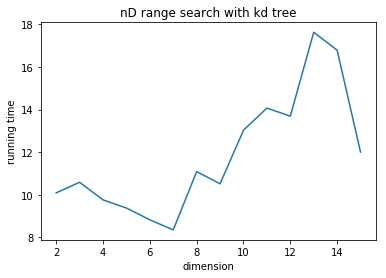

In [200]:
plt.plot(dimensions, running_time_range)
plt.title("nD range search with kd tree")
plt.ylabel("running time")
plt.xlabel("dimension")
plt.show()